In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df= pd.read_csv('/content/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [32]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [35]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [37]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [38]:
df.shape

(150, 5)

In [39]:
#Changing column needs as per our convineance
df.columns=['Sepal_Length','Sepal_width','Petal_Length','Petal_Width','Species']

In [40]:
flower_count =df['Species'].value_counts()
print("Count of the floer type of species in the data:")
flower_count

Count of the floer type of species in the data:


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [41]:
df.head()

,Sepal_Length,Sepal_width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
#Silencing warnings for better visualization
import warnings
warnings. filterwarnings('ignore',category=FutureWarning)

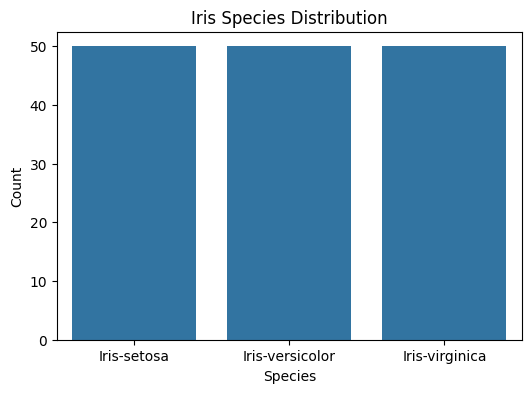

In [43]:
#Bar plot of iris species distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Species',data=df)
plt.title('Iris Species Distribution')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

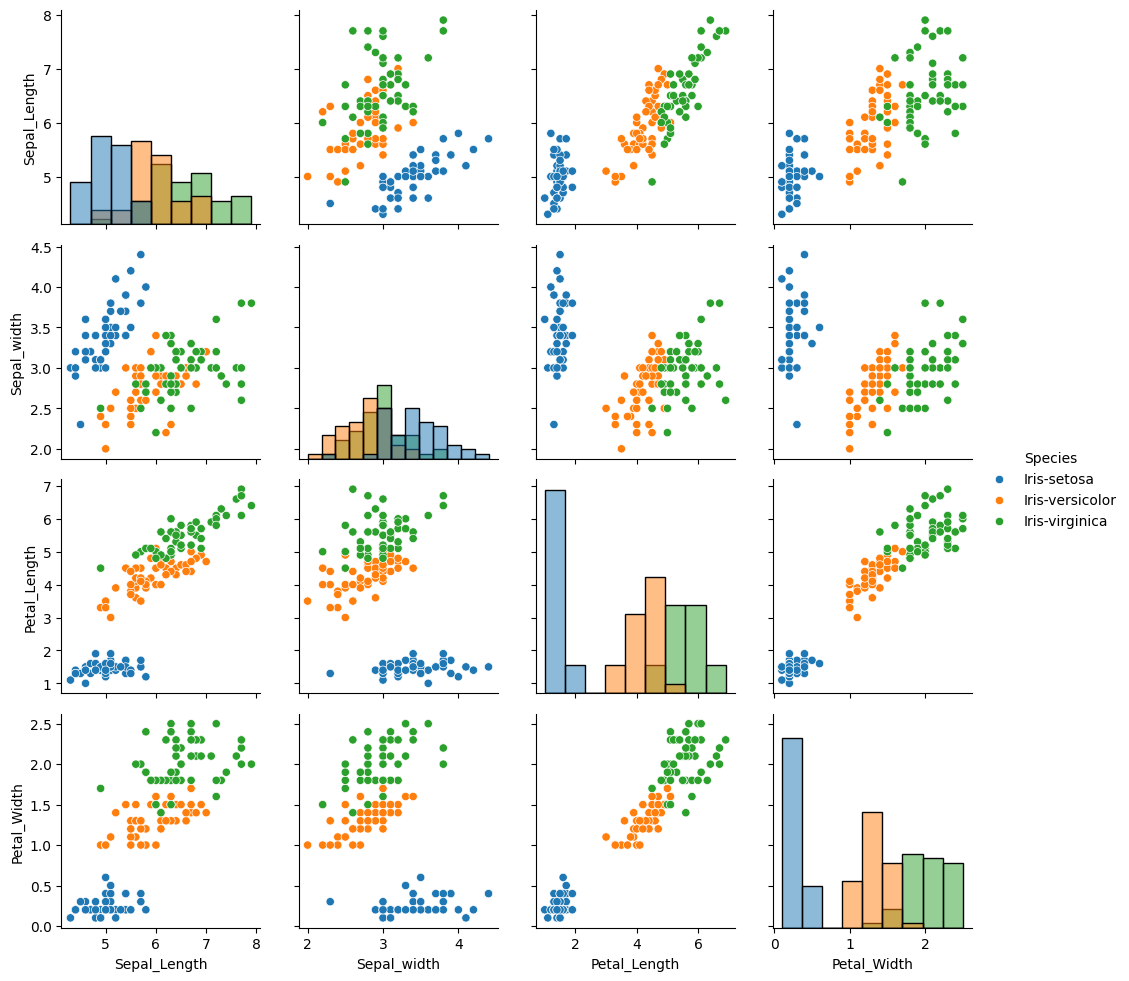

In [44]:
g=sns.PairGrid(df, hue='Species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [45]:
df.head()

,Sepal_Length,Sepal_width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Mean Squared Error: 0.23386845786901478
R-squared: 0.9286418347661203


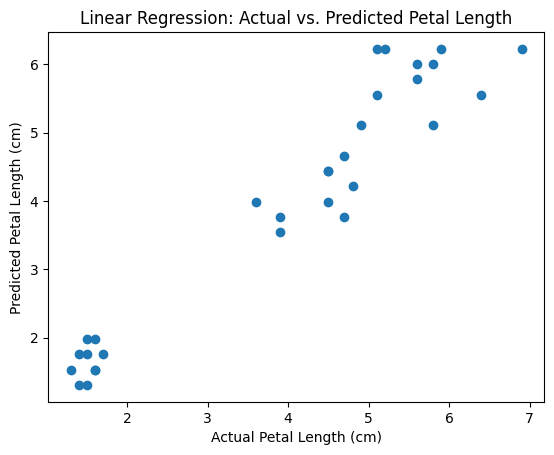

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Iris dataset
X,Y=df['Petal_Length'], df['Petal_Width']

# Select the features and target variable (petal length)
X= df[['Petal_Width']]
Y= df[['Petal_Length']]

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

# Inintialize and train a linear regression model
model=LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Evaluate the model
mse= mean_squared_error(Y_test, Y_pred)
r2= r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:",r2)

%matplotlib inline
# Plot the predicted VS acyual petal length
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actual Petal Length (cm)")
plt.ylabel("Predicted Petal Length (cm)")
plt.title("Linear Regression: Actual vs. Predicted Petal Length")
plt.show()

In [47]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 1) (30, 1) (120, 1) (30, 1)


#Applying logistic regression for Petal_Length and Petal_Width as they had the better correlation between them as observed in heatmap

Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


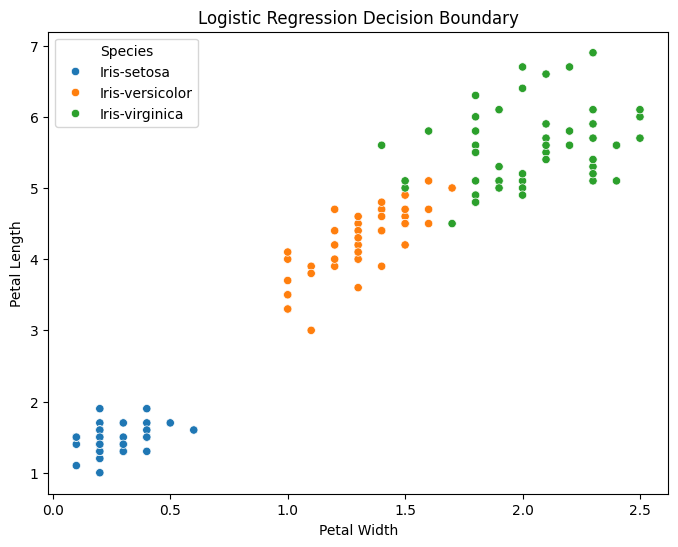

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X1 = df[['Petal_Width', 'Petal_Length']]
Y1 = df['Species']

# Split the data into training and testing sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

#Standardize the features

scaler=StandardScaler()

X1_train = scaler.fit_transform(X1_train)
X1_test =  scaler.transform(X1_test)

#Initialize and train a logistic regression model
model=LogisticRegression(random_state=42)
model.fit(X1_train, Y1_train)

#Make predictions on the test set
Y1_pred=model.predict(X1_test)

#Evaluate the model
accuracy=accuracy_score(Y1_test, Y1_pred)
report = classification_report(Y1_test, Y1_pred)
conf_matrix = confusion_matrix(Y1_test, Y1_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

%matplotlib inline
# Visualize the decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Petal_Width', y='Petal_Length', hue='Species', data=df)

# Plot decision boundary and margins
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Petal Width")
plt.ylabel("Petal Length")
plt.show()

In [49]:
X1_train

array([[-1.30948358, -1.5639872 ],
       [-1.04292204, -1.27728011],
       [ 0.28988568,  0.38562104],
       [-1.30948358, -1.21993869],
       [-1.30948358, -1.39196294],
       [ 0.95628954,  0.72966956],
       [ 0.42316645,  0.44296246],
       [-1.30948358, -1.27728011],
       [-1.30948358, -1.33462153],
       [-1.44276436, -1.27728011],
       [ 0.95628954,  0.78701097],
       [ 0.55644722,  0.44296246],
       [ 0.42316645,  0.5576453 ],
       [-1.04292204, -1.39196294],
       [-1.30948358, -1.27728011],
       [-0.24323741, -0.01576889],
       [ 0.42316645,  0.78701097],
       [ 0.82300877,  1.01637665],
       [ 0.28988568,  0.38562104],
       [ 1.75597417,  1.36042516],
       [ 0.15660491,  0.2709382 ],
       [ 1.22285108,  1.64713226],
       [ 0.42316645,  0.44296246],
       [-1.30948358, -1.33462153],
       [ 1.08957031,  1.70447368],
       [-0.24323741,  0.21359679],
       [-1.30948358, -1.33462153],
       [-1.17620281, -1.39196294],
       [-1.04292204,

In [50]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 1) (30, 1) (120, 1) (30, 1)


In [51]:
adc=np.array([[-1.30948358,-1.5639872]])
adc.reshape(-1,1)
model.predict(adc)

array(['Iris-setosa'], dtype=object)

#Checked manually by giving a value present in our dataset and got the correct answer
******************************************************************************
#Applying logistic regression for Sepal_Length and Sepal_Width


Accuracy: 0.9
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.88      0.78      0.82         9
 Iris-virginica       0.83      0.91      0.87        11

       accuracy                           0.90        30
      macro avg       0.90      0.90      0.90        30
   weighted avg       0.90      0.90      0.90        30

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  1 10]]


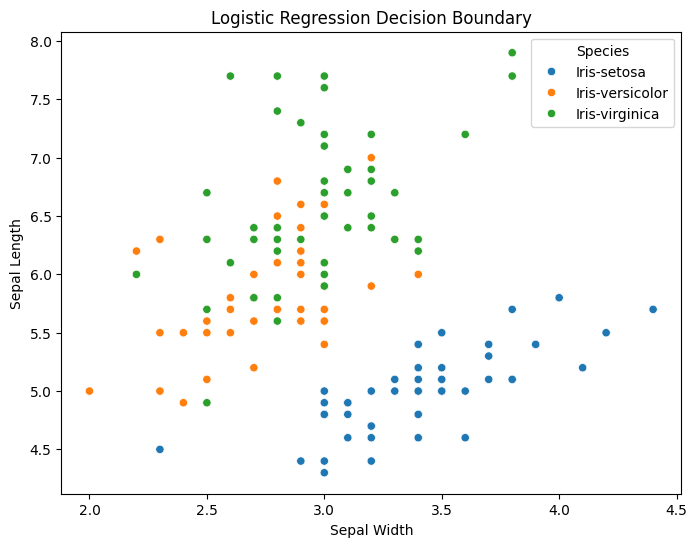

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X2 = df[['Sepal_width', 'Sepal_Length']]
Y2 = df['Species']

# Split the data into training and testing sets
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X2_train= scaler.fit_transform(X2_train)
X2_test=scaler.transform(X2_test)

#Initialize and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X2_train, Y2_train)

#Make predictions on the test set
Y2_pred=model.predict(X2_test)

#Evaluate the model

accuracy=accuracy_score(Y2_test, Y2_pred)
report=classification_report(Y2_test, Y2_pred)
conf_matrix=confusion_matrix(Y2_test, Y2_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

%matplotlib inline
#Visualize the decision boundary
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sepal_width', y='Sepal_Length', hue='Species', data=df)

# Plot decision boundary and margins
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Sepal Width")
plt.ylabel("Sepal Length")
plt.show()

#As we can see first we applied logistic regression using Petal_Width and Petal_Length and second we applied using Sepal_Width and Sepal_Length.
#We get more accuracy while using Petal_Width and Petal_Length
***************************************************************************
#Applying Decision Tree Classification

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have your data Loaded into a DataFrame named 'df'
X3=df[['Petal_Width', 'Petal_Length']]
Y3=df['Species']

# Split the data into training and testing sets
X3_train, X3_test, Y3_train, Y3_test=train_test_split(X3, Y3, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
model=DecisionTreeClassifier(random_state=42)
model.fit(X3_train, Y3_train)

#Make predictions on the test set
Y3_pred=model.predict(X3_test)

#Evaluate the model

accuracy=accuracy_score(Y3_test, Y3_pred)
report=classification_report(Y3_test, Y3_pred)
conf_matrix=confusion_matrix(Y3_test, Y3_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


#We get the same accuracy as it came for Logistic Regression. So we can use any one of the Machine Learning Techniue for Iris Flower Classification